## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve)

# Imbalance handling
from imblearn.over_sampling import SMOTE

print("All libraries imported successfully!")

All libraries imported successfully!


## Data Collection

In [2]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

df = pd.read_csv(url, names=column_names, na_values='?')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
df.head()


Dataset loaded successfully!
Dataset shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## EDA


EXPLORATORY DATA ANALYSIS

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None

--- Statistical Summary ---
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.0

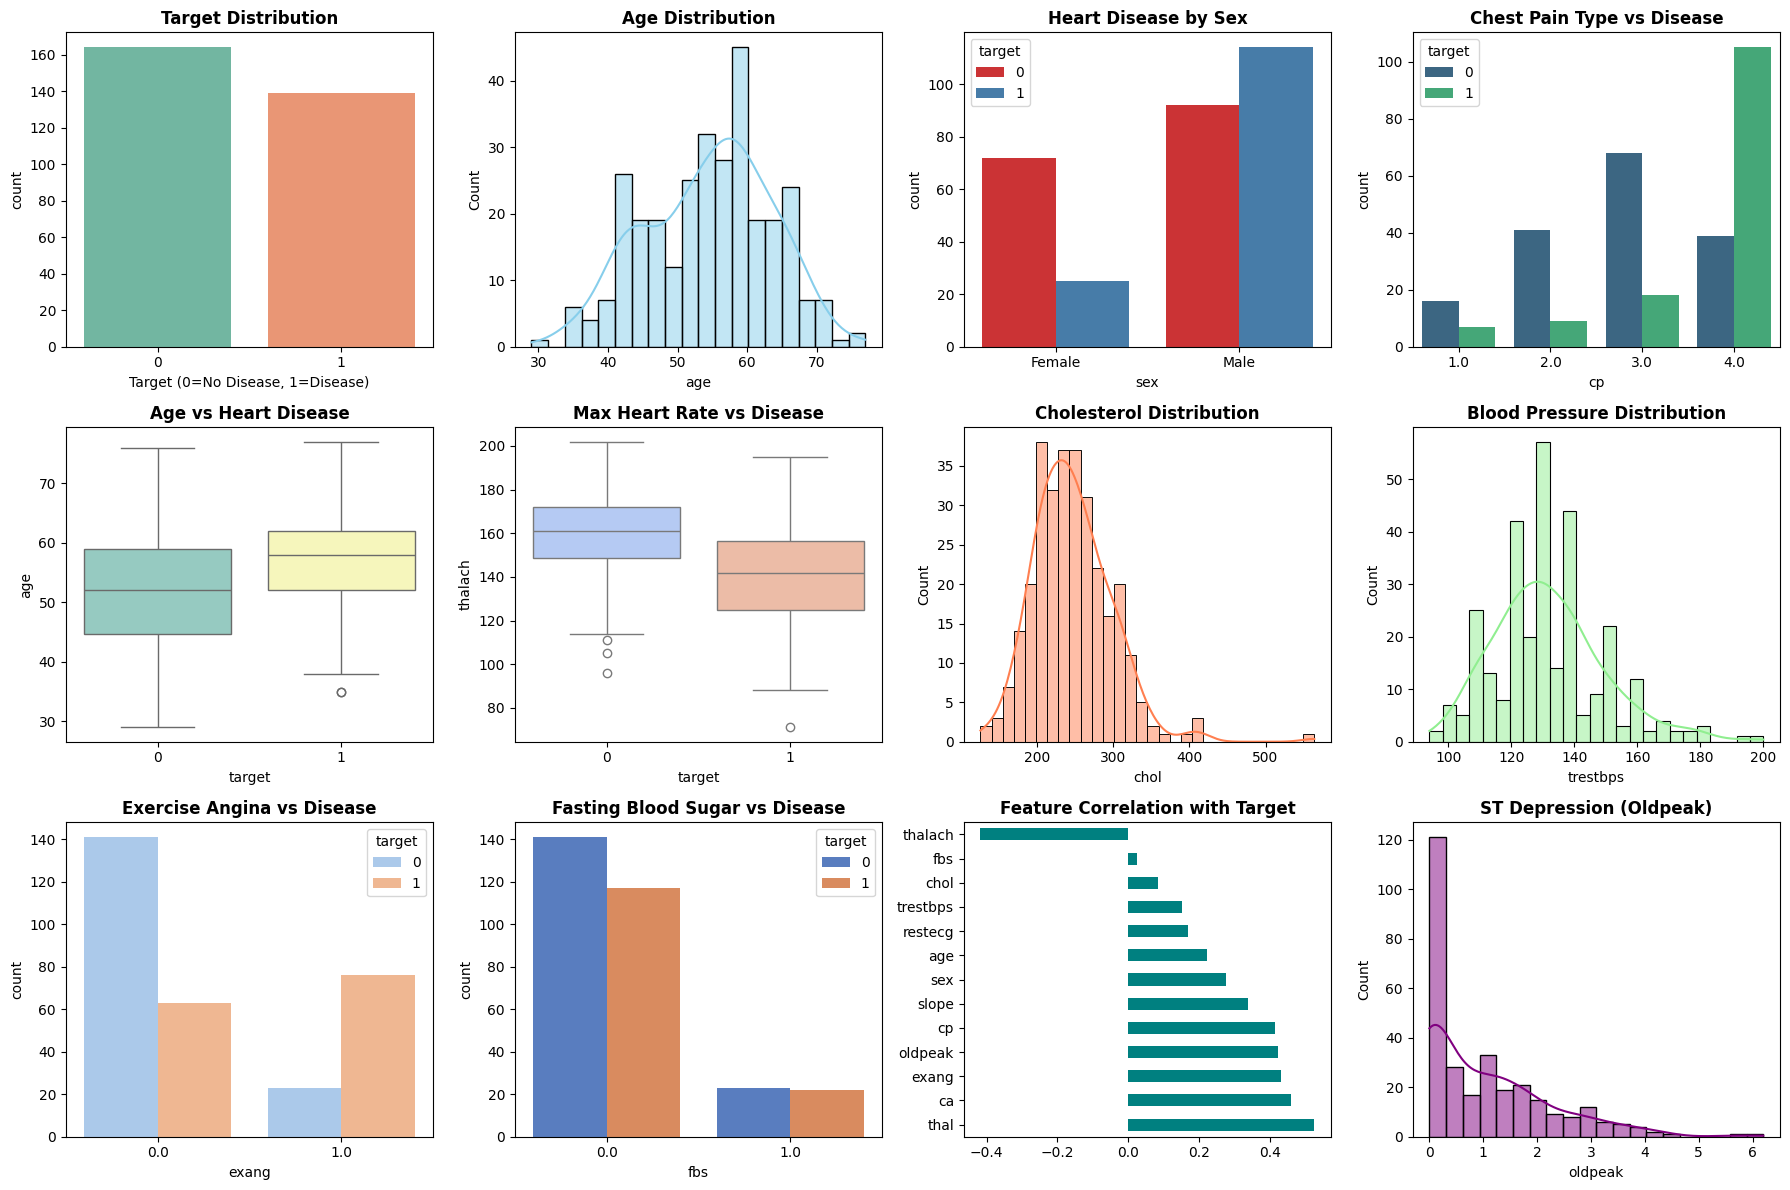

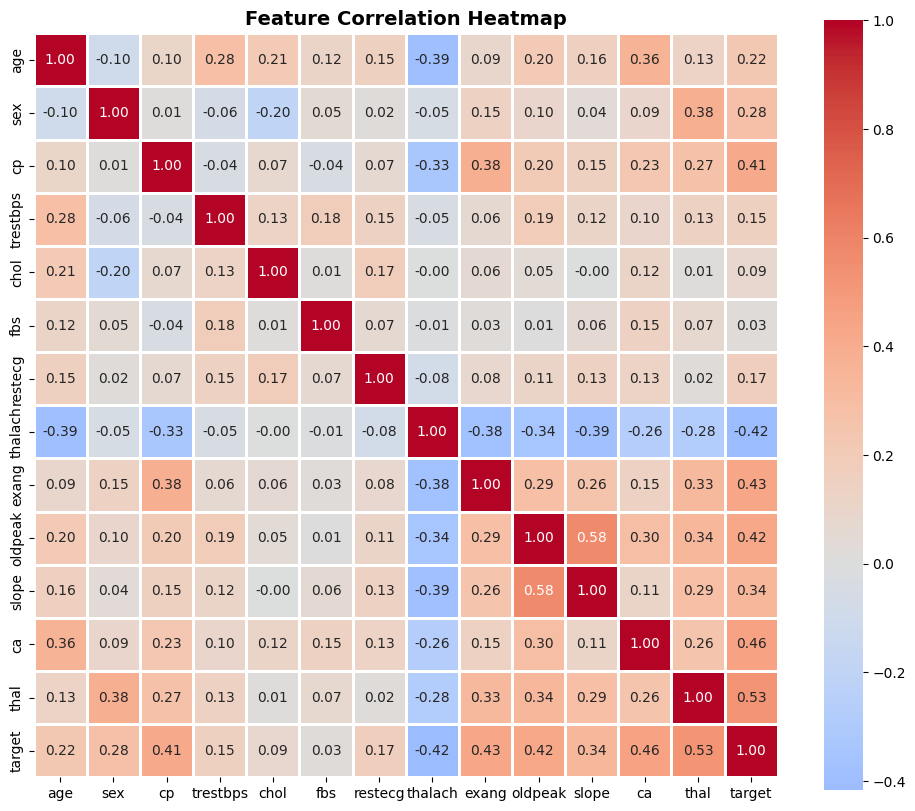


--- Key EDA Observations ---
1. Total samples: 303
2. Average age: 54.44 years
3. Male/Female ratio: 206/97
4. Disease prevalence: 45.87%
5. Average cholesterol: 246.69 mg/dl


In [3]:

print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

print("\n--- Dataset Information ---")
print(df.info())

print("\n--- Statistical Summary ---")
print(df.describe())

print("\n--- Missing Values ---")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

print("\n--- Target Variable Distribution ---")
print(df['target'].value_counts())

# Convert target to binary
df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1)
print("\n--- Binary Target Distribution ---")
print(df['target'].value_counts())

# EDA Visualizations
fig = plt.figure(figsize=(18, 12))

plt.subplot(3, 4, 1)
sns.countplot(data=df, x='target', palette='Set2')
plt.title('Target Distribution', fontweight='bold')
plt.xlabel('Target (0=No Disease, 1=Disease)')

plt.subplot(3, 4, 2)
sns.histplot(data=df, x='age', bins=20, kde=True, color='skyblue')
plt.title('Age Distribution', fontweight='bold')

plt.subplot(3, 4, 3)
sns.countplot(data=df, x='sex', hue='target', palette='Set1')
plt.title('Heart Disease by Sex', fontweight='bold')
plt.xticks([0, 1], ['Female', 'Male'])

plt.subplot(3, 4, 4)
sns.countplot(data=df, x='cp', hue='target', palette='viridis')
plt.title('Chest Pain Type vs Disease', fontweight='bold')

plt.subplot(3, 4, 5)
sns.boxplot(data=df, x='target', y='age', palette='Set3')
plt.title('Age vs Heart Disease', fontweight='bold')

plt.subplot(3, 4, 6)
sns.boxplot(data=df, x='target', y='thalach', palette='coolwarm')
plt.title('Max Heart Rate vs Disease', fontweight='bold')

plt.subplot(3, 4, 7)
sns.histplot(data=df, x='chol', bins=30, kde=True, color='coral')
plt.title('Cholesterol Distribution', fontweight='bold')

plt.subplot(3, 4, 8)
sns.histplot(data=df, x='trestbps', bins=25, kde=True, color='lightgreen')
plt.title('Blood Pressure Distribution', fontweight='bold')

plt.subplot(3, 4, 9)
sns.countplot(data=df, x='exang', hue='target', palette='pastel')
plt.title('Exercise Angina vs Disease', fontweight='bold')

plt.subplot(3, 4, 10)
sns.countplot(data=df, x='fbs', hue='target', palette='muted')
plt.title('Fasting Blood Sugar vs Disease', fontweight='bold')

plt.subplot(3, 4, 11)
correlation_with_target = df.corr()['target'].sort_values(ascending=False)[1:]
correlation_with_target.plot(kind='barh', color='teal')
plt.title('Feature Correlation with Target', fontweight='bold')

plt.subplot(3, 4, 12)
sns.histplot(data=df, x='oldpeak', bins=20, kde=True, color='purple')
plt.title('ST Depression (Oldpeak)', fontweight='bold')

plt.tight_layout()
plt.savefig('eda_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n--- Key EDA Observations ---")
print(f"1. Total samples: {len(df)}")
print(f"2. Average age: {df['age'].mean():.2f} years")
print(f"3. Male/Female ratio: {(df['sex']==1).sum()}/{(df['sex']==0).sum()}")
print(f"4. Disease prevalence: {(df['target']==1).sum()/len(df)*100:.2f}%")
print(f"5. Average cholesterol: {df['chol'].mean():.2f} mg/dl")

## Data Preprocessing

In [4]:

print("\n" + "="*80)
print("DATA PREPROCESSING")
print("="*80)

df_processed = df.copy()

# Handle missing values
print("\n--- Handling Missing Values ---")
print(f"Missing values before: {df_processed.isnull().sum().sum()}")

for col in df_processed.columns:
    if df_processed[col].isnull().sum() > 0:
        df_processed[col].fillna(df_processed[col].median(), inplace=True)
        print(f"Filled {col} with median")

print(f"Missing values after: {df_processed.isnull().sum().sum()}")

# Outlier Detection
print("\n--- Outlier Detection (IQR Method) ---")
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for col in numerical_cols:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_processed[(df_processed[col] < lower_bound) | 
                            (df_processed[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected")
    
    # Cap outliers
    df_processed[col] = df_processed[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers capped successfully!")

# Separate features and target
X = df_processed.drop('target', axis=1)
y = df_processed['target']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

print("\n--- Class Distribution ---")
print(y.value_counts())


DATA PREPROCESSING

--- Handling Missing Values ---
Missing values before: 6
Filled ca with median
Filled thal with median
Missing values after: 0

--- Outlier Detection (IQR Method) ---
age: 0 outliers detected
trestbps: 9 outliers detected
chol: 5 outliers detected
thalach: 1 outliers detected
oldpeak: 5 outliers detected
Outliers capped successfully!

Features shape: (303, 13)
Target shape: (303,)

--- Class Distribution ---
target
0    164
1    139
Name: count, dtype: int64


## Feature Selection


FEATURE SELECTION

--- Chi-Square Feature Selection ---
     Feature  Chi2_Score
12      thal   44.877965
8      exang   38.052613
11        ca   28.038394
9    oldpeak   16.817971
10     slope   10.984336
1        sex    7.432845
2         cp    7.384879
6    restecg    4.322448
7    thalach    3.576580
0        age    1.005896
3   trestbps    0.619899
4       chol    0.251667
5        fbs    0.164669

--- ANOVA F-test Feature Selection ---
     Feature  ANOVA_Score
12      thal   112.770163
11        ca    80.800610
8      exang    69.020891
9    oldpeak    68.400247
7    thalach    63.587697
2         cp    62.423779
10     slope    39.138194
1        sex    24.978872
0        age    15.769637
6    restecg     8.871394
3   trestbps     6.462598
4       chol     3.284557
5        fbs     0.192237

--- Mutual Information Feature Selection ---
     Feature  MI_Score
2         cp  0.126399
12      thal  0.124001
11        ca  0.110049
9    oldpeak  0.102705
10     slope  0.102157
8    

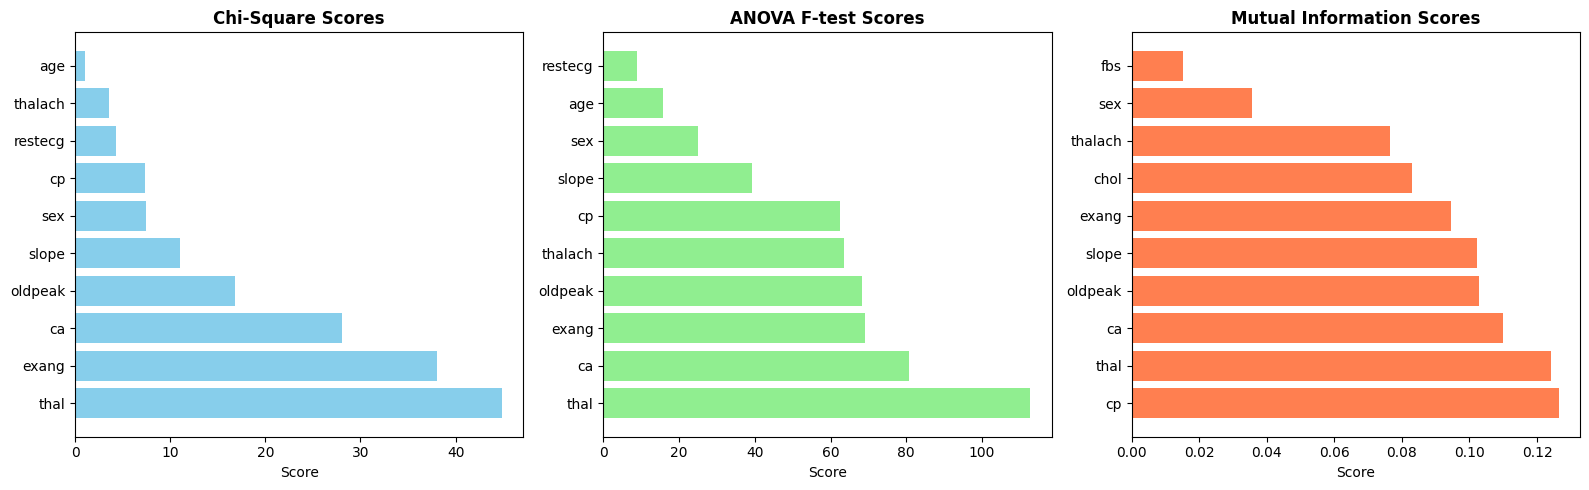

In [5]:
print("\n" + "="*80)
print("FEATURE SELECTION")
print("="*80)

# Chi-Square Test
print("\n--- Chi-Square Feature Selection ---")
X_non_negative = (X - X.min()) / (X.max() - X.min())
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(X_non_negative, y)
chi_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2_Score': chi_selector.scores_
}).sort_values('Chi2_Score', ascending=False)
print(chi_scores)

# ANOVA F-test
print("\n--- ANOVA F-test Feature Selection ---")
anova_selector = SelectKBest(f_classif, k=10)
anova_selector.fit(X, y)
anova_scores = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA_Score': anova_selector.scores_
}).sort_values('ANOVA_Score', ascending=False)
print(anova_scores)

# Mutual Information
print("\n--- Mutual Information Feature Selection ---")
mi_selector = SelectKBest(mutual_info_classif, k=10)
mi_selector.fit(X, y)
mi_scores = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_selector.scores_
}).sort_values('MI_Score', ascending=False)
print(mi_scores)

# Visualize feature selection results
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

axes[0].barh(chi_scores['Feature'][:10], chi_scores['Chi2_Score'][:10], color='skyblue')
axes[0].set_title('Chi-Square Scores', fontweight='bold')
axes[0].set_xlabel('Score')

axes[1].barh(anova_scores['Feature'][:10], anova_scores['ANOVA_Score'][:10], color='lightgreen')
axes[1].set_title('ANOVA F-test Scores', fontweight='bold')
axes[1].set_xlabel('Score')

axes[2].barh(mi_scores['Feature'][:10], mi_scores['MI_Score'][:10], color='coral')
axes[2].set_title('Mutual Information Scores', fontweight='bold')
axes[2].set_xlabel('Score')

plt.tight_layout()
plt.savefig('feature_selection.png', dpi=300, bbox_inches='tight')
plt.show()

## Data splitting & Scaling

In [6]:
print("\n" + "="*80)
print("DATA SPLITTING AND SCALING")
print("="*80)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      random_state=42, stratify=y)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("StandardScaler applied successfully!")

# Handle Class Imbalance with SMOTE
print("\n--- Handling Class Imbalance with SMOTE ---")
print("Original class distribution:")
print(pd.Series(y_train).value_counts())

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
print(f"\nAfter SMOTE: {X_train_smote.shape}")
print(pd.Series(y_train_smote).value_counts())


DATA SPLITTING AND SCALING
Training set: (242, 13)
Test set: (61, 13)
StandardScaler applied successfully!

--- Handling Class Imbalance with SMOTE ---
Original class distribution:
target
0    131
1    111
Name: count, dtype: int64

After SMOTE: (262, 13)
target
1    131
0    131
Name: count, dtype: int64


## Baseline model training

In [7]:
print("\n" + "="*80)
print("BASELINE MODEL TRAINING")
print("="*80)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

baseline_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    baseline_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }
    
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

baseline_df = pd.DataFrame(baseline_results).T
print("\n--- Baseline Model Comparison ---")
print(baseline_df)


BASELINE MODEL TRAINING

Training Logistic Regression...
Accuracy: 0.8689, Precision: 0.8125, Recall: 0.9286, F1: 0.8667

Training Decision Tree...
Accuracy: 0.8197, Precision: 0.7576, Recall: 0.8929, F1: 0.8197

Training Random Forest...
Accuracy: 0.8852, Precision: 0.8387, Recall: 0.9286, F1: 0.8814

Training SVM...
Accuracy: 0.8689, Precision: 0.8333, Recall: 0.8929, F1: 0.8621

Training Naive Bayes...
Accuracy: 0.8689, Precision: 0.7941, Recall: 0.9643, F1: 0.8710

Training AdaBoost...
Accuracy: 0.9016, Precision: 0.8438, Recall: 0.9643, F1: 0.9000

Training XGBoost...
Accuracy: 0.8525, Precision: 0.7879, Recall: 0.9286, F1: 0.8525

--- Baseline Model Comparison ---
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.868852   0.812500  0.928571  0.866667  0.946970
Decision Tree        0.819672   0.757576  0.892857  0.819672  0.825216
Random Forest        0.885246   0.838710  0.928571  0.881356  0.952381
SVM                  0.868852   0.83

## Model training with smote

In [8]:
print("\n" + "="*80)
print("MODEL TRAINING WITH SMOTE")
print("="*80)

smote_results = {}

for name, model in models.items():
    print(f"\nTraining {name} with SMOTE...")
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    smote_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Model': model
    }

smote_df = pd.DataFrame({k: {m: v for m, v in d.items() if m != 'Model'} 
                         for k, d in smote_results.items()}).T
print("\n--- SMOTE Model Comparison ---")
print(smote_df)


MODEL TRAINING WITH SMOTE

Training Logistic Regression with SMOTE...

Training Decision Tree with SMOTE...

Training Random Forest with SMOTE...

Training SVM with SMOTE...

Training Naive Bayes with SMOTE...

Training AdaBoost with SMOTE...

Training XGBoost with SMOTE...

--- SMOTE Model Comparison ---
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.868852   0.812500  0.928571  0.866667  0.948052
Decision Tree        0.770492   0.705882  0.857143  0.774194  0.777056
Random Forest        0.918033   0.870968  0.964286  0.915254  0.946429
SVM                  0.852459   0.806452  0.892857  0.847458  0.943723
Naive Bayes          0.868852   0.794118  0.964286  0.870968  0.950216
AdaBoost             0.868852   0.812500  0.928571  0.866667  0.953463
XGBoost              0.819672   0.742857  0.928571  0.825397  0.929654


## Hyperparameter tuning

In [9]:
print("\n" + "="*80)
print("HYPERPARAMETER TUNING")
print("="*80)

param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }
}

tuned_models = {}
tuned_results = {}

for name, param_grid in param_grids.items():
    print(f"\nTuning {name}...")
    
    base_model = models[name]
    grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid,
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
    
    grid_search.fit(X_train_smote, y_train_smote)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    tuned_models[name] = best_model
    tuned_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Best_Params': grid_search.best_params_
    }
    
    print(f"Test Accuracy: {accuracy:.4f}, F1: {f1:.4f}")

tuned_df = pd.DataFrame({k: {m: v for m, v in d.items() if m != 'Best_Params'} 
                         for k, d in tuned_results.items()}).T


HYPERPARAMETER TUNING

Tuning Random Forest...
Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score: 0.8205
Test Accuracy: 0.8852, F1: 0.8814

Tuning XGBoost...
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best CV score: 0.8129
Test Accuracy: 0.8689, F1: 0.8621

Tuning SVM...
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV score: 0.8281
Test Accuracy: 0.8525, F1: 0.8475


## Comparative Analysis


COMPARATIVE ANALYSIS


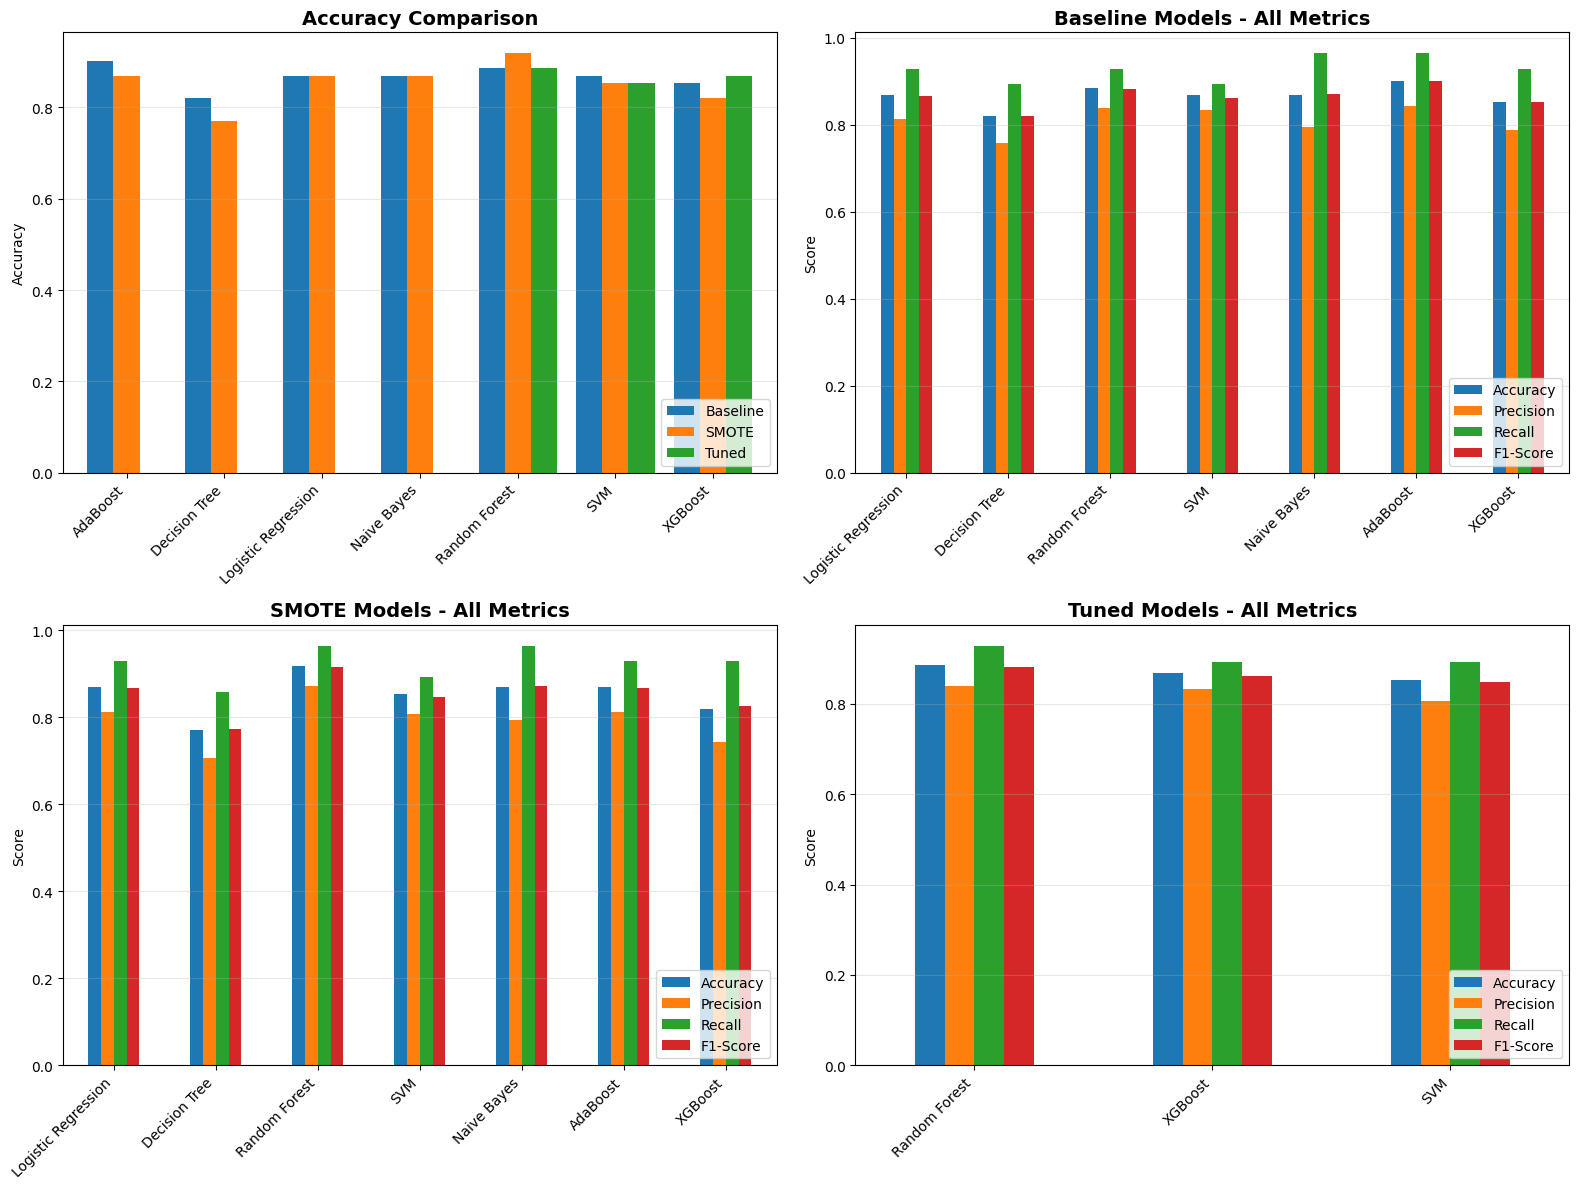

In [10]:
print("\n" + "="*80)
print("COMPARATIVE ANALYSIS")
print("="*80)

# Comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Baseline vs SMOTE vs Tuned - Accuracy
comparison_df = pd.DataFrame({
    'Baseline': baseline_df['Accuracy'],
    'SMOTE': smote_df['Accuracy'],
    'Tuned': tuned_df['Accuracy']
})
comparison_df.plot(kind='bar', ax=axes[0, 0], width=0.8)
axes[0, 0].set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_xticklabels(comparison_df.index, rotation=45, ha='right')
axes[0, 0].legend(loc='lower right')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. All models - Multiple metrics
baseline_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Baseline Models - All Metrics', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_xticklabels(baseline_df.index, rotation=45, ha='right')
axes[0, 1].legend(loc='lower right')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. SMOTE models performance
smote_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('SMOTE Models - All Metrics', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_xticklabels(smote_df.index, rotation=45, ha='right')
axes[1, 0].legend(loc='lower right')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Tuned models performance
tuned_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Tuned Models - All Metrics', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_xticklabels(tuned_df.index, rotation=45, ha='right')
axes[1, 1].legend(loc='lower right')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


## Best Model Evaluation


BEST MODEL EVALUATION

*** BEST MODEL: Random Forest ***
Accuracy: 0.8852
Precision: 0.8387
Recall: 0.9286
F1-Score: 0.8814
ROC-AUC: 0.9437

--- Confusion Matrix ---
[[28  5]
 [ 2 26]]

--- Classification Report ---
              precision    recall  f1-score   support

  No Disease       0.93      0.85      0.89        33
     Disease       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



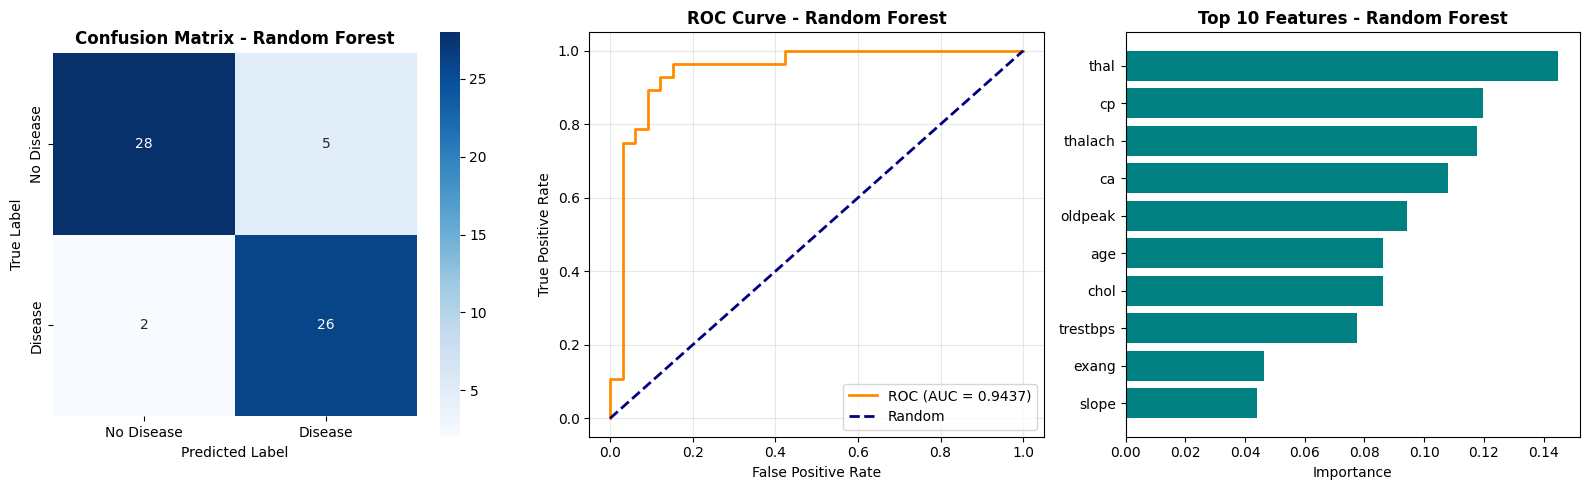

In [11]:
print("\n" + "="*80)
print("BEST MODEL EVALUATION")
print("="*80)

best_model_name = tuned_df['Accuracy'].idxmax()
best_model = tuned_models[best_model_name]

print(f"\n*** BEST MODEL: {best_model_name} ***")
print(f"Accuracy: {tuned_df.loc[best_model_name, 'Accuracy']:.4f}")
print(f"Precision: {tuned_df.loc[best_model_name, 'Precision']:.4f}")
print(f"Recall: {tuned_df.loc[best_model_name, 'Recall']:.4f}")
print(f"F1-Score: {tuned_df.loc[best_model_name, 'F1-Score']:.4f}")
print(f"ROC-AUC: {tuned_df.loc[best_model_name, 'ROC-AUC']:.4f}")

y_pred_best = best_model.predict(X_test_scaled)
y_pred_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
print("\n--- Confusion Matrix ---")
print(cm)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_best, 
                          target_names=['No Disease', 'Disease']))

# Visualizations
fig = plt.figure(figsize=(16, 5))

# 1. Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# 2. ROC Curve
plt.subplot(1, 3, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best)
roc_auc = roc_auc_score(y_test, y_pred_proba_best)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name}', fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

# 3. Feature Importance (if available)
plt.subplot(1, 3, 3)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.barh(feature_importance['Feature'][:10], 
             feature_importance['Importance'][:10], color='teal')
    plt.xlabel('Importance')
    plt.title(f'Top 10 Features - {best_model_name}', fontweight='bold')
    plt.gca().invert_yaxis()
else:
    plt.text(0.5, 0.5, 'Feature importance\nnot available\nfor this model', 
             ha='center', va='center', fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.savefig('best_model_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

## Final Summary

In [12]:

print("\n" + "="*80)
print("FINAL SUMMARY")
print("="*80)

print("\n### DATASET ###")
print(f"Total samples: {len(df)}")
print(f"Features: {X.shape[1]}")
print(f"Training: {len(X_train)}, Test: {len(X_test)}")

print("\n### PREPROCESSING ###")
print("- Missing values: Filled with median")
print("- Outliers: Capped using IQR method")
print("- Scaling: StandardScaler")
print("- Imbalance: SMOTE")

print("\n### FEATURE SELECTION ###")
print("- Chi-Square, ANOVA F-test, Mutual Information")

print("\n### MODELS EVALUATED ###")
print(f"- Baseline models: {len(baseline_results)}")
print(f"- SMOTE models: {len(smote_results)}")
print(f"- Tuned models: {len(tuned_results)}")

print("\n### BEST MODEL PERFORMANCE ###")
print(f"Model: {best_model_name}")
print(f"Accuracy: {tuned_df.loc[best_model_name, 'Accuracy']:.4f}")
print(f"Precision: {tuned_df.loc[best_model_name, 'Precision']:.4f}")
print(f"Recall: {tuned_df.loc[best_model_name, 'Recall']:.4f}")
print(f"F1-Score: {tuned_df.loc[best_model_name, 'F1-Score']:.4f}")
print(f"ROC-AUC: {tuned_df.loc[best_model_name, 'ROC-AUC']:.4f}")

# Final comparison table
final_summary = pd.DataFrame({
    'Model': list(tuned_results.keys()),
    'Baseline_Acc': [baseline_results[m]['Accuracy'] for m in tuned_results.keys()],
    'SMOTE_Acc': [smote_results[m]['Accuracy'] for m in tuned_results.keys()],
    'Tuned_Acc': [tuned_results[m]['Accuracy'] for m in tuned_results.keys()],
    'Tuned_F1': [tuned_results[m]['F1-Score'] for m in tuned_results.keys()],
    'Tuned_ROC': [tuned_results[m]['ROC-AUC'] for m in tuned_results.keys()]
})

print("\n### COMPREHENSIVE RESULTS TABLE ###")
print(final_summary.to_string(index=False))

print("\n" + "="*80)
print("PROJECT COMPLETED!")
print("="*80)
print("\nGenerated files:")
print("- eda_visualizations.png")
print("- correlation_heatmap.png")
print("- feature_selection.png")
print("- model_comparison.png")
print("- best_model_evaluation.png")


FINAL SUMMARY

### DATASET ###
Total samples: 303
Features: 13
Training: 242, Test: 61

### PREPROCESSING ###
- Missing values: Filled with median
- Outliers: Capped using IQR method
- Scaling: StandardScaler
- Imbalance: SMOTE

### FEATURE SELECTION ###
- Chi-Square, ANOVA F-test, Mutual Information

### MODELS EVALUATED ###
- Baseline models: 7
- SMOTE models: 7
- Tuned models: 3

### BEST MODEL PERFORMANCE ###
Model: Random Forest
Accuracy: 0.8852
Precision: 0.8387
Recall: 0.9286
F1-Score: 0.8814
ROC-AUC: 0.9437

### COMPREHENSIVE RESULTS TABLE ###
        Model  Baseline_Acc  SMOTE_Acc  Tuned_Acc  Tuned_F1  Tuned_ROC
Random Forest      0.885246   0.918033   0.885246  0.881356   0.943723
      XGBoost      0.852459   0.819672   0.868852  0.862069   0.918831
          SVM      0.868852   0.852459   0.852459  0.847458   0.943723

PROJECT COMPLETED!

Generated files:
- eda_visualizations.png
- correlation_heatmap.png
- feature_selection.png
- model_comparison.png
- best_model_evaluati